In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import  numpy as np

In [3]:
# load dataset
series = pd.read_csv('/Users/vokeojuederhie/PycharmProjects/untitled6/timeseries.csv', parse_dates=['invoice_date'], index_col='invoice_date')
series_data = series.dropna(axis=0)

              net_weight
invoice_date            
2015-03-05         131.0
2015-03-06         164.0
2015-03-07         187.0
2015-03-08         235.0
2015-03-09         213.0
2015-03-10         181.0
2015-03-11         160.0
2015-03-12         161.0
2015-03-13         195.0
2015-03-14         151.0
2015-03-15         159.0
2015-03-16         149.0
2015-03-17         160.0
2015-03-18         137.0
2015-03-19         129.0
2015-03-20         153.0
2015-03-21         171.0
2015-03-22         155.0
2015-03-23         131.0
2015-03-24         118.0


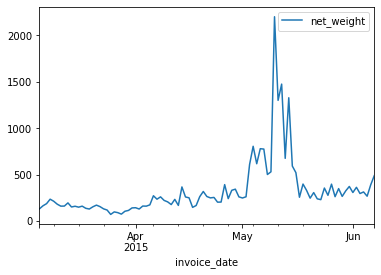

In [4]:
# display first few rows
print(series_data.head(20))

# line plot of dataset
series_data.plot()
plt.show()

In [5]:
# splitting the dataset into training
# and validation datasets
split_point = len(series_data) - 7

dataset, validation = series_data[0:split_point], series_data[split_point:]
print('Dataset %d, Validation %d' %(len(dataset), len(validation)))
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

Dataset 88, Validation 7


In [5]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return np.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [1]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import pandas as pd

# create a differenced series

def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return np.array(diff)

series = pd.read_csv('dataset.csv', header=None)
series_data = series.dropna(axis=0)
# seasonal difference

X = series_data.values
days_in_year = 365
differenced = difference(X, days_in_year)

# fit model

model = ARIMA(differenced, order=(1,0,1))
model_fit = model.fit(disp=1)

# print summary of fit model
print(model_fit.summary())

/Users/vokeojuederhie/.conda/envs/untitled6/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ValueError: Insufficient degrees of freedom to estimate

In [9]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1

for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1


NameError: name 'model_fit' is not defined